In [1]:
#-- Import Libraries ------------------------------------------------------------------------------------------
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
import ast
#--------------------------------------------------------------------------------------------------------------

In [2]:
#-- Load Results ----------------------------------------------------------------------------------------------
results_file_path = "/kaggle/input/novin-zsod-burglary-detection-5/results.csv"  
df_results = pd.read_csv(results_file_path)

print(df_results.shape)
#--------------------------------------------------------------------------------------------------------------

(68, 5)


In [3]:
#-- Map text labels to integers -------------------------------------------------------------------------------
label_mapping = {'burglary': 1, 'not burglary': 0}
df_results['true_label_mapped'] =df_results['true_label'].map(label_mapping)
df_results['predicted_label_mapped'] = df_results['predicted_label'].map(label_mapping)

# print(df_results)
#--------------------------------------------------------------------------------------------------------------

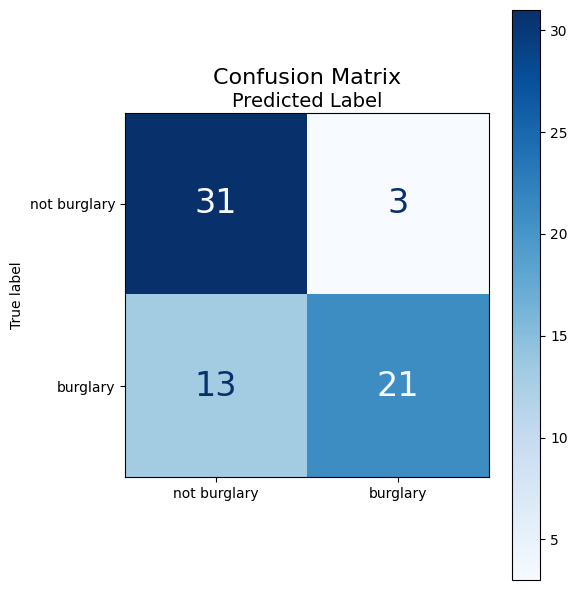

In [4]:
#-- Create and Display the confusion matrix --------------------------------------------------------------------
cm = confusion_matrix(df_results['true_label_mapped'], df_results['predicted_label_mapped'])

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not burglary' , 'burglary'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix", fontsize=16)
ax.set_xlabel('')
ax.xaxis.set_label_position('top')  
ax.set_xticks(ax.get_xticks())  
ax.set_xlabel('Predicted Label', fontsize=14)  
if disp.text_ is not None:  
    for text in disp.text_.ravel():  
        if text:  
            text.set_fontsize(24)  
plt.tight_layout()
plt.show()
#--------------------------------------------------------------------------------------------------------------

In [5]:
#-- Caclyate Evaluation Matrics -------------------------------------------------------------------------------
accuracy = accuracy_score(df_results['true_label_mapped'], df_results['predicted_label_mapped'])
precision = precision_score(df_results['true_label_mapped'], df_results['predicted_label_mapped'])
recall = recall_score(df_results['true_label_mapped'], df_results['predicted_label_mapped'])

print(f"Accuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")
#--------------------------------------------------------------------------------------------------------------

Accuracy: 0.76
Precision: 0.88
Recall: 0.62


In [6]:
#-- Calculate TP, TN, FP, and FN ----------------------------------------------------------------------------
TP = df_results[(df_results['true_label'] == 'burglary') & (df_results['predicted_label'] == 'burglary')]
TP_count = len(TP) 

TN = df_results[(df_results['true_label'] == 'not burglary') & (df_results['predicted_label'] == 'not burglary')]
TN_count = len(TN)  

FP = df_results[(df_results['true_label'] == 'not burglary') & (df_results['predicted_label'] == 'burglary')]
FP_count = len(FP)  

FN = df_results[(df_results['true_label'] == 'burglary') & (df_results['predicted_label'] == 'not burglary')]
FN_count = len(FN)  

print(f'TP: {TP_count}\nTN: {TN_count}\nFP: {FP_count}\nFN: {FN_count}')

#--------------------------------------------------------------------------------------------------------------

TP: 21
TN: 31
FP: 3
FN: 13


In [7]:
for index, row in FN.iterrows():
    video_name = row['video_file']
    threshold = row['burglary_threshold']
    all_detected_prompts = ast.literal_eval(row['all_detected_prompts'])
    
    print(f'\n\n\n=== {video_name} - threshold = {threshold} ==========================')
    for (p,n) in all_detected_prompts:
        print(f'{p} : {n}')
    
   




=== burglary_10.mp4 - threshold = 108 ==========================
Person wearing a mask and avoiding detection : 55
Person climbing a wall : 13
Person carrying tools like a crowbar : 52
Person jumping out of a window : 1
Person tampering with a security camera : 5



=== burglary_12.mp4 - threshold = 41 ==========================
Person climbing a wall : 30
Person carrying tools like a crowbar : 1



=== burglary_13.mp4 - threshold = 257 ==========================
Person climbing a wall : 1
Person wearing a mask and avoiding detection : 1
Person carrying tools like a crowbar : 46



=== burglary_16.mp4 - threshold = 277 ==========================
Person carrying tools like a crowbar : 42



=== burglary_17.mp4 - threshold = 153 ==========================
Person trying to pick a lock : 13
Person running away from a building : 1
Person carrying tools like a crowbar : 29
Person tampering with a security camera : 5
Person wearing a mask and avoiding detection : 50
Person climbing a wall 